#import libararies & installation

In [ ]:
!pip install gensim


In [ ]:
!pip install num2words


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=618d083747629dc5904de1b6944eec4d57bfc21bf416f66aa79fd345b6480cc9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
import re
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#load & preprocessing

In [ ]:
traindata = pd.read_excel("/content/drive/MyDrive/NLP/News_train.xlsx")
testdata = pd.read_excel("/content/drive/MyDrive/NLP/News_test.xlsx")


In [ ]:
traindata

,Type,News
0,politics,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...
1,politics,عون: الحريري أصبح غريب الأطوار
2,politics,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...
3,politics,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...
4,politics,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي
...,...,...
4995,politics,أوروبا تبدأ إحصاء خسائر الفيضانات المدمرة
4996,politics,قتل متظاهر بالرصاص خلال احتجاجات على شحّ الميا...
4997,politics,وسائل إعلام إيرانية تتحدث عن اندلاع احتجاجات ف...
4998,politics,المفاوضات الأفغانية تتواصل في العاصمة القطرية ...


<Axes: xlabel='Type'>

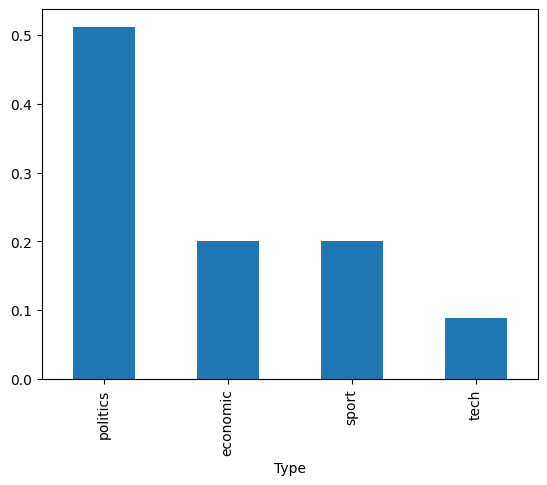

In [ ]:
testdata['Type'].value_counts(normalize = True).plot.bar()

In [ ]:
testdata['Type'].unique()

array(['politics', 'economic', 'sport', 'tech'], dtype=object)

In [ ]:
testdata['Type'] = testdata['Type'].replace({'politics': 0, 'economic': 1, 'sport': 2, 'tech': 3})


In [ ]:
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'آب', 'جيم', 'أصلا', 'ما أفعله', 'جوان', 'اللذان', 'كثيرا', 'غدا', 'أوه', 'بهن', 'اربعون', 'ثم', 'جعل', 'خبَّر', 'عشر', 'أبو', 'بس', 'ضاد', 'حسب', 'كم', 'معاذ', 'كِخ', 'أما', 'التي', 'حزيران', 'ياء', 'ش', 'آي', 'متى', 'هلّا', 'أعطى', 'تجاه', 'نيف', 'سحقا', 'لستم', 'نعم', 'بيد', 'ستمئة', 'نحن', 'بلى', 'له', 'ظنَّ', 'عدا', 'آناء', 'أوت', 'أيّان', 'مما', 'بخٍ', 'أجل', 'يورو', 'صار', 'ما', 'مئتان', 'ن', 'ب', 'والذي', 'هاك', 'حبذا', 'غداة', 'كيت', 'رجع', 'أربعمائة', 'أربع', 'إياكما', 'ستين', 'ذاك', 'رزق', 'أين', 'ممن', 'هَذِي', 'صراحة', 'حمدا', 'مايو', 'بعدا', 'دواليك', 'م', 'مه', 'ثان', 'الآن', 'أخٌ', 'فو', 'إياك', 'ذانك', 'اللواتي', 'فوق', 'ريال', 'أكثر', 'هذان', 'ذال', 'لا', 'أخو', 'لهم', 'بئس', 'قبل', 'إحدى', 'لاسيما', 'ألا', 'أربعة', 'هنالك', 'أصبح', 'بما', 'يمين', 'لكما', 'كليكما', 'جانفي', 'نفس', 'بك', 'نبَّا', 'سبت', 'نَخْ', 'لو', 'مئة', 'أولالك', 'لمّا', 'به', 'ظ', 'تفعلون', 'تسع', 'انبرى', 'أسكن', 'يفعلون', 'خ', 'يناير', 'ولو', 'أنّى', 'خلا', 'لعل', 'هناك', 'أعلم', 'كأنّ', 'كان',

In [ ]:
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
   # ازالة الحركات
    noise = re.compile(""" ّ    | # Tashdid
                       َ    | # Fatha
                       ً    | # Tanwin Fath
                       ُ    | # Damma
                       ٌ    | # Tanwin Damm
                       ِ    | # Kasra
                       ٍ    | # Tanwin Kasr
                       ْ    | # Sukun
                      ـ     # Tatwil/Kashida
                    """, re.VERBOSE)
    processed_text = re.sub(noise, '', text)
    processed_text = re.sub(r'(.)\1+', r"\1\1", text)
    tokens = nltk.word_tokenize(text)

    #punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
    #tokens = [token for token in tokens if re.match(r'\w', token) or token == '?']
    numbers = re.compile(r'\b\d+\b')
    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if token not in stop_words]

    # 5. lemmatization
    #هي عمليه ارجاع الكلمات الى جذورها الاصليه
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    #تحويل الكلمات إلى نص مرة اخرى
    processed_text = ' '.join(tokens).strip()

    # Remove longation (diacritics) and numbers
    processed_text = re.sub(r'\b\d+\b', replace_numbers_with_words, processed_text)
    processed_text = re.sub("[إأآا]", "ا", processed_text)
    processed_text = re.sub("ى", "ي", processed_text)
    processed_text = re.sub("ؤ", "و", processed_text)
    processed_text = re.sub("ئ", "ي", processed_text)
    processed_text = re.sub("ة", "ه", processed_text)
    processed_text = re.sub("گ", "ك", processed_text)
    processed_text = re.sub("أ", "ا", processed_text)
    processed_text = re.sub("إ", "ا", processed_text)
    processed_text = re.sub("لإ", "لا", processed_text)
    processed_text = re.sub(r"\b(ال|في|على|من|إلى|عن)\b", "", processed_text)
    processed_text = re.sub(r'[^\w\s]', '', processed_text)

    processed_text = re.sub("NFT", "الصور الرقمية ", processed_text)
    processed_text = re.sub("Covax ", "كوفاكس و هي ركيزة اللقاحات لمبادرة تسريع إتاحة أدوات مكافحة كوفيد", processed_text)
    processed_text = re.sub("Sony Airpeak", " ", processed_text)
    processed_text = re.sub("PCR", " اختبار مرض فايروس كورونا", processed_text)
    processed_text = re.sub("QS", " الخاص بالجامعات ", processed_text)
    processed_text = re.sub("سبوتنيك V", " ", processed_text)
    processed_text = re.sub("Xbox", " جهاز مايكروسوفت للألعاب", processed_text)
    processed_text = re.sub("كوفيد19", " فايروس كورونا", processed_text)
    processed_text = re.sub("الحريري-عون", " عون حريري", processed_text)


    processed_text = re.sub("[إأآا]", "ا", processed_text)
    # ازالة الحركات
    #diacritics_pattern = re.compile(r'[\u064B-\u0652\u064F-\u0655\u0670]')
    text = re.sub('[\u064B-\u0652\u064F-\u0655\u0670]', '', text)
    # فصل الكلمات العربية عن الانجليزية من خلال معرفة اذا ما كان الحرف انجليزي ام لا فيصع مسافة امامه
    processed_text = re.sub(r'[a-zA-Z]+', r' \g<0> ', processed_text)
    # جعل المافات الكثيرة مسافة واحدة فقط
    #strip() تزيل المسافات الزائدة
    processed_text = re.sub(r"\s+", " ", processed_text).strip()
    # ازالة حرف ال من اول كلمة تحتوي عليه

    processed_text = re.sub(r"\bو", "", processed_text)
    processed_text = re.sub(r"\bال", "", processed_text)
    processed_text = re.sub(r"\bوال", " ", processed_text)
    processed_text = re.sub(r"\bعال", " ", processed_text)
    processed_text = re.sub(r"\bفال", " ", processed_text)
    processed_text = re.sub("%", "بالمئة", processed_text)

    return processed_text.strip()

def replace_numbers_with_words(match):
    return num2words(int(match.group()), lang='ar')

In [ ]:
preprocessed_documents = [preprocess_text(doc) for doc in testdata['News']]
preprocessed_documents

['ميات قتلي فيضانات اوروبا',
 'جوله مفاوضات جديده تفشل كسر جمود ازمه قبرصيه',
 'قضاء فرنسي يفتح تحقيقا حول بيغاسوس بشان تجسس صحافيين',
 'زير دفاع اسراييلي يزور فرنسا لبحث قضيه بيغاسوس',
 'بدا عده دول سريان حظر شامل للحد انتشار فيروس كورونا',
 'حكومه اردنيه تصدر اجراءات مشدده للحد تفشي فيروس كورونا',
 'حركه طالبان تطلق سراح عشرات قوات حكومه افغانيه',
 'عشرات قتلي طالبان قوات حكوميه افغانستان',
 'سودان يجدد رفضه اجرءات اثيوبيا احاديه اعلان اخيره استكمال تعبيه سد نهضه',
 'رييس وزراء اثيوبي يوجه رساله جديده مصر سودان تمام ملء ثاني لسد نهضه',
 'مستشاره المانيه تزور منطقه شهدت كارثه فيضانات بلاد',
 'ميركل تصف خساير فيضانات بالمخيفه',
 'سلطات امريكيه تعتقل مستشار للرييس اميركي سابق بتهمه عماله للامارات',
 'زاره عدل امريكيه ترفض تعليق تقارير تحقيقات تجري سفير دوله امارات',
 'صرحت روسيا تري طالبان تمثل تهديدا لاسيا وسطي',
 'روسيا تقدم مساعدات لطالبان',
 'شركه تركيه للصناعه طايرات تكشف اصدار جديد طايراتها',
 'شركه بايكار تعتزم بناء مركز لتجميع طايرات مسيره',
 'اعلن رييس اميركي تمديد حاله طواري و

In [ ]:
testdata['Preprocessed'] = testdata['News'].apply(preprocess_text)


In [ ]:
traindata.head(1000)

,Type,News
0,politics,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...
1,politics,عون: الحريري أصبح غريب الأطوار
2,politics,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...
3,politics,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...
4,politics,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي
...,...,...
995,economic,البرهان يصدر مرسوما ينص على إنشاء نظام فدرالي ...
996,economic,شركة آركن التركية للمولدات تمكنت من إنتاج نموذ...
997,economic,بعد إعلانها عن 300 وظيفة.. شركة تركية تتلقى أك...
998,economic,بنك السودان المركزي يصدر تعليمات بتوحيد سعر الصرف


#Word embding + Model

The best models obtained from the training data were selected and applied to the test data.

#####SkipGram

In [ ]:
!wget 'https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip'

--2024-06-11 23:33:32--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488871452 (1.4G) [application/zip]
Saving to: ‘full_grams_sg_300_wiki.zip.1’

l_grams_sg_300_wiki  14%[=>                  ] 206.94M  79.3MB/s               ^C


In [ ]:
!unzip '/content/full_grams_sg_300_wiki.zip'

Archive:  /content/full_grams_sg_300_wiki.zip
  inflating: full_grams_sg_300_wiki.mdl  
  inflating: full_grams_sg_300_wiki.mdl.trainables.syn1neg.npy   bad CRC 025479a0  (should be 55675a21)
  inflating: full_grams_sg_300_wiki.mdl.wv.vectors.npy  


In [ ]:
X = x = testdata['Preprocessed']
y = testdata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
w2v_model = Word2Vec.load('/content/full_grams_sg_300_wiki.mdl')
embedding_dim = w2v_model.vector_size
OOV_tokens = []
train_tokens = []
test_tokens = []

def get_doc_vec(sent, model, data):
    w2v_embeddings = []
    tokens = sent.split()
    for word in tokens:
        try:
            if data == 'train':
                w2v_embeddings.append(model.wv[word])
                train_tokens.append(word)
            else:
                w2v_embeddings.append(model.wv[word])
                test_tokens.append(word)
        except:
            OOV_tokens.append(word)
            continue
    if len(w2v_embeddings) == 0:
        return None
    return sum(w2v_embeddings) / len(w2v_embeddings)

X_train_w2v_embeddings = X_train.apply(lambda sent: get_doc_vec(sent, w2v_model, 'train'))
X_test_w2v_embeddings = X_test.apply(lambda sent: get_doc_vec(sent, w2v_model, 'test'))

In [ ]:
X_train_w2v_embeddings_list = []
for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_w2v_embeddings_list.append(np.zeros_like(X_train_w2v_embeddings[0]))

X_test_w2v_embeddings_list = []
for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_w2v_embeddings_list.append(np.zeros_like(X_test_w2v_embeddings[0]))


In [ ]:
X_train_w2v_embeddings_array_skip = np.array(X_train_w2v_embeddings_list)
X_test_w2v_embeddings_array_skip = np.array(X_test_w2v_embeddings_list)

##### Naive bayes

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_embeddings_array_skip, y_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_embeddings_array_skip)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       123
           1       0.78      0.81      0.80        53
           2       0.98      0.96      0.97        48
           3       0.80      0.77      0.78        26

    accuracy                           0.87       250
   macro avg       0.86      0.85      0.86       250
weighted avg       0.87      0.87      0.87       250



#####BERT

In [ ]:
!pip install transformers


In [ ]:
import pandas as pd
import re
import re
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')
le = LabelEncoder()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define the device based on CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading the tokenizer and model from Hugging Face
model_name = 'aubmindlab/bert-base-arabert'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Move model to the appropriate device
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/717k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.26M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = testdata['Preprocessed']
y = le.fit_transform(testdata['Type'])

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabert')

# Tokenize the data
training = tokenizer(X_train.tolist(), add_special_tokens=True, return_attention_mask=True,
                     padding='max_length', max_length=256, return_tensors='pt')
testing = tokenizer(X_val.tolist(), add_special_tokens=True, return_attention_mask=True,
                    padding='max_length', max_length=256, return_tensors='pt')

train_dataset = TensorDataset(training['input_ids'], training['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(testing['input_ids'], testing['attention_mask'], torch.tensor(y_val))

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=24)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=24)

model = BertForSequenceClassification.from_pretrained('aubmindlab/bert-base-arabert', num_labels=4,
                                                      output_attentions=False, output_hidden_states=False)
model.to(device)

# Set up the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

# Training
epochs = 2
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# Evaluation
model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    batch_predictions = np.argmax(logits, axis=1)
    predictions.extend(batch_predictions)  # Ensure predictions is a list
    true_labels.extend(label_ids)          # Ensure true_labels is a list

# Calculate and print metrics
accuracy = np.mean(np.array(predictions) == np.array(true_labels))
print("Accuracy:", accuracy)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
report = classification_report(true_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.8170053029761595
Epoch 2, Loss: 0.283803662066074
Accuracy: 0.925
Precision: 0.9352550028918449
Recall: 0.925
F1 Score: 0.9263943279964372
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        99
           1       0.78      1.00      0.88        39
           2       1.00      0.98      0.99        41
           3       0.95      0.86      0.90        21

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.94      0.93      0.93       200

